Import necessary packages

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression as logit
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
import numpy as np
import tensorflow as tf
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

np.random.seed(0)
tf.random.set_seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

Import data and separate labels and features into training and testing sets

In [32]:
path_dir = "/content/Acoustic_Extinguisher_Fire_Dataset.csv"
all_data = pd.read_csv(path_dir, header='infer')
all_data = pd.get_dummies(all_data, columns=['FUEL'])
Features = all_data.drop(columns=["STATUS"])
Labels = all_data["STATUS"]
X_train, X_test, y_train, y_test = train_test_split(Features,Labels,test_size=0.3)

Support Vector Machine Model

Text(0.5, 1.0, 'SVM Testing Accuracy is 94.28626027135486%')

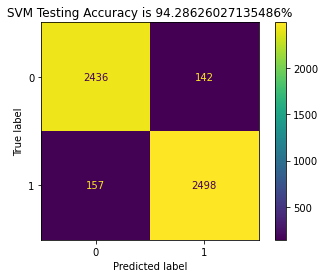

In [25]:
clf_SVM = svm.SVC(kernel='rbf',C=1000,tol=1e-5,probability=True)
clf_SVM.fit(X_train,y_train)

plot_confusion_matrix(clf_SVM, X_test,y_test)
plt.title('SVM Testing Accuracy is '+str(clf_SVM.score(X_test,y_test)*100)+'%')

Perceptron Model

Text(0.5, 1.0, 'Perceptron Test Accuracy is 80.31721765717562%')

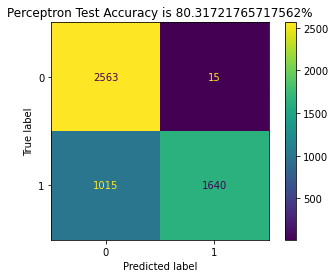

In [26]:
clf_P = Perceptron(tol=1e-5, max_iter=1000)
clf_P.fit(X_train,y_train)


plot_confusion_matrix(clf_P, X_test,y_test)
plt.title('Perceptron Test Accuracy is '+str(clf_P.score(X_test,y_test)*100)+'%')

Logistic Model 

Text(0.5, 1.0, 'Logistic Testing Accuracy is 89.71909038792279%')

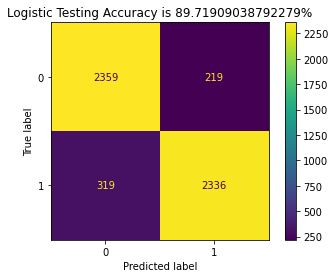

In [27]:
clf_L = logit(C=1000, tol=1e-5, max_iter = 1000)
clf_L.fit(X_train,y_train)

plot_confusion_matrix(clf_L, X_test,y_test)
plt.title('Logistic Testing Accuracy is '+str(clf_L.score(X_test,y_test)*100)+'%')

From these three, the SVM does the best by far with 94.29% accuracy. Let's look at their ROC curves, noting that the Perceptron model has to be calibrated first:

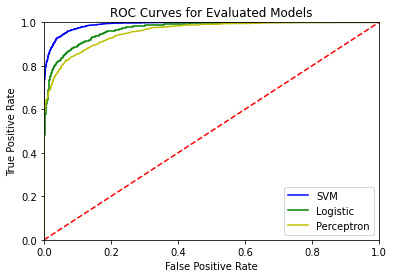

In [28]:
probabilities = clf_SVM.predict_proba(np.array(X_test))
predictions = probabilities[:, 1]
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

probabilities = clf_L.predict_proba(np.array(X_test))
predictions = probabilities[:, 1]
fpr2, tpr2, threshold2 = roc_curve(y_test, predictions)
roc_auc2 = auc(fpr2, tpr2)

clf_isotonic = CalibratedClassifierCV(clf_P, cv=3, method='isotonic')
clf_isotonic.fit(X_train, y_train)
predictions = clf_isotonic.predict_proba(X_test)
fpr3, tpr3, threshold3 = roc_curve(y_test, predictions[:,1])
roc_auc3 = auc(fpr3, tpr3)

plt.title('ROC Curves for Evaluated Models')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'g', label='AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'y', label='AUC = %0.2f' % roc_auc3)
plt.legend(['SVM', 'Logistic', 'Perceptron'])
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Let's see if interactions can improve our top model (SVM)

Text(0.5, 1.0, 'SVM Testing Accuracy is 94.68755971717944%')

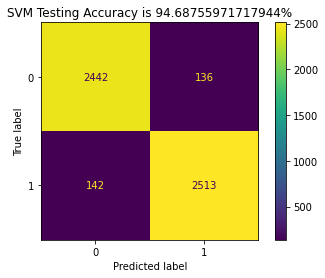

In [29]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_inter = interaction.fit_transform(X_train)
X_new = sm.add_constant(X_inter)
clf_SVM_inter = svm.SVC(kernel='rbf',C=1000,tol=1e-5,probability=True).fit(X_new,y_train)

X_inter2 = interaction.fit_transform(X_test)
X_new_test = sm.add_constant(X_inter2)
plot_confusion_matrix(clf_SVM_inter, X_new_test,y_test)
plt.title('SVM Testing Accuracy is '+str(clf_SVM_inter.score(X_new_test,y_test)*100)+'%')

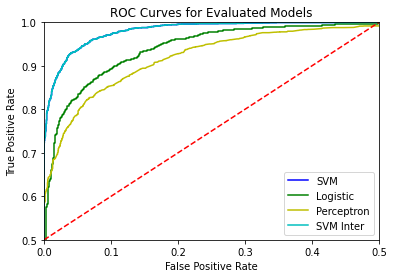

In [30]:
probabilities = clf_SVM.predict_proba(np.array(X_test))
predictions = probabilities[:, 1]
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

probabilities = clf_L.predict_proba(np.array(X_test))
predictions = probabilities[:, 1]
fpr2, tpr2, threshold2 = roc_curve(y_test, predictions)
roc_auc2 = auc(fpr2, tpr2)

clf_isotonic = CalibratedClassifierCV(clf_P, cv=3, method='isotonic')
clf_isotonic.fit(X_train, y_train)
predictions = clf_isotonic.predict_proba(X_test)
fpr3, tpr3, threshold3 = roc_curve(y_test, predictions[:,1])
roc_auc3 = auc(fpr3, tpr3)

probabilities = clf_SVM.predict_proba(np.array(X_test))
predictions = probabilities[:, 1]
fpr4, tpr4, threshold = roc_curve(y_test, predictions)
roc_auc4 = auc(fpr4, tpr4)

plt.title('ROC Curves for Evaluated Models')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'g', label='AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'y', label='AUC = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'c', label='AUC = %0.2f' % roc_auc4)
plt.legend(['SVM', 'Logistic', 'Perceptron', 'SVM Inter'])
plt.plot([0, 0.5], [0.5, 1], 'r--')
plt.xlim([0, 0.5])
plt.ylim([0.5, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Interaction Model has a slightly more accurate percent prediction, but ROC curve is identical to normal SVM Model

